<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Lab3_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from numpy.random import sample
%matplotlib inline

df = pd.read_excel("/content/insurance_dataset.xls")

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [207]:
#Train and Test set split into 80% and 20% respectively
x_train, x_rest, y_train, y_rest = train_test_split(df.X,df.Y,test_size = .4,random_state =0)
#Rest of the 40% set split into equal parts of Train and Validation set 
x_test, x_val, y_test, y_val = train_test_split(x_train,y_train,test_size = .5,random_state = 0)
#Therefore : Train = 60%, Test = 20% and Validation = 20%

In [208]:
x_mean = np.mean(x_train)
y_mean = np.mean(y_train)
n = len(x_train)# using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
X = np.array(x_train)
Y = np.array(y_train)
for i in range(n):
    numerator += (X[i] - x_mean) * (Y[i] - y_mean)
    denominator += (X[i] - x_mean) ** 2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)
C = b0
M = b1
print(b1, b0)

3.416948742599191 18.31114211789668


intercept and slope on whole set : 
3.4138235600663664 19.99448575911481

In [209]:
def pred_y(x):
    return (C + M * x)
    
def predict(x):
    y_pred = []
    for value in x:
        y_pred.append(pred_y(value))
    return y_pred

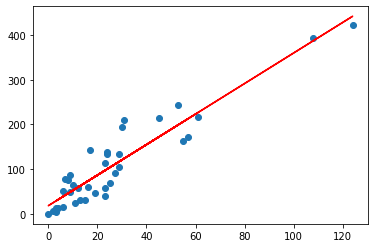

In [210]:
plt.scatter(x_train,y_train)
plt.plot(x_train,predict(x_train),color = "red")    #best fit line

In [211]:
print("Mean Absolute Error on Test:  %.3f" % mean_absolute_error(y_test,predict(x_test)))
print("Mean Absolute Error on Train: %.3f" %mean_absolute_error(y_train,predict(x_train)))

Mean Absolute Error on Test:  30.821
Mean Absolute Error on Train: 29.748


Using Gradient descent


In [212]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(x_train)
y_test = np.array(x_test)
x_train = x_train.reshape(-1,1)
y_train = y_train.reshape(-1,1)
x_test = x_test.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [213]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [214]:
def gradientDescent(x,y,lr, epochs):
    costs = []
    b0, b1 = 0.0, 1.0
    for epoch in range(epochs):
        # initialize to 0 -> cost of epoch, Jb_0, Jb_1
        epoch_cost, cost_b0, cost_b1 = 0, 0, 0
        
        for i in range(len(x)):
            # make prediction
            y_pred = (b0 + b1*x[i])
            # append squared error
            epoch_cost += (y[i] - y_pred)**2 
            
            for j in range(len(x)):
                # partial derivative of b0 and b1 for current row
                partial_wrt_b0 = -2 * (y[j] - (b0 + b1*x[j]))
                partial_wrt_b1 = (-2 * x[j]) * (y[j] - (b0 + b1*x[j]))
                
                # increase cost of coeffs
                cost_b0 += partial_wrt_b0
                cost_b1 += partial_wrt_b1

            # calculate new coeffs
            b0 = b0 - lr * cost_b0
            b1 = b1 - lr * cost_b1
            
        # keep track of errors - for visualization purposes
        costs.append(epoch_cost)
    return b0,b1,costs


In [215]:
C,M,costs = gradientDescent(x_train,y_train,0.001,15)

In [216]:
def predict(x,C,M):
    y_pred = []
    for value in x:
        y = (C + M * value)
        y_pred.append(y)
    return y_pred

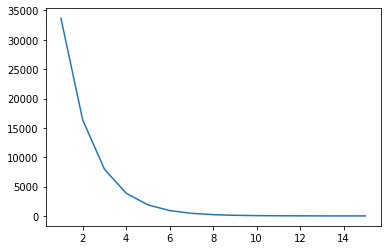

In [217]:
plt.plot(range(1,len(costs)+1),costs)

In [218]:
y_pred = predict(x_test,C,M)

In [219]:
print("Mean Absolute Error on Test:  %.3f" %mean_absolute_error(y_test.reshape(-1,1),y_pred))
print("Mean Absolute Error on Train: %.3f" %mean_absolute_error(y_train,predict(x_train,C,M)))

Mean Absolute Error on Test:  0.080
Mean Absolute Error on Train: 0.117


In [220]:
print(r2_score(y_train,predict(x_train,C,M)))

0.9999624052841763


Part 2 : Boston Housing 

In [221]:
from sklearn.datasets import load_boston

boston_df = pd.DataFrame(load_boston().data,columns = load_boston().feature_names)

y = load_boston().target
x = load_boston().data

boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [222]:
#Train and Test set split into 80% and 20% respectively
x_train, x_rest, y_train, y_rest = train_test_split(x,y,test_size = .4,random_state =0)

#Rest of the 40% set split into equal parts of Train and Validation set 
x_test, x_val, y_test, y_val = train_test_split(x_train,y_train,test_size = .5,random_state = 0)

#Therefore : Train = 60%, Test = 20% and Validation = 20%

In [223]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_val = y_val.reshape(-1)

In [224]:
def multiGrad(train_data,learning_rate,n_iter,k):
    
    # Initially we will keep our W and B as 0 as per the Training Data
    w=np.zeros(shape=(1,train_data.shape[1]-1))
    b=0
    
    cur_iter=1
    while(cur_iter<=n_iter): 

        # create a small training data set of size K (Batches of size K)
        temp=train_data.sample(k)
        
        # X and Y from the above temp dataset
        y=np.array(temp[13])
        x=np.array(temp.drop(13,axis=1))
        
        # initial gradients as 0
        w_gradient=np.zeros(shape=(1,train_data.shape[1]-1))
        b_gradient=0
        
        for i in range(k): # Calculating gradients for point in our dataset
            prediction=np.dot(w,x[i])+b
            w_gradient=w_gradient+(-2)*x[i]*(y[i]-(prediction))
            b_gradient=b_gradient+(-2)*(y[i]-(prediction))
        
        #Updating the weights(W) and Bias(b) with the above calculated Gradients
        w=w-learning_rate*(w_gradient/k)
        b=b-learning_rate*(b_gradient/k)
        
        cur_iter=cur_iter+1
    return w,b #Returning the weights and Bias

In [225]:
def predict(x,w,b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

In [226]:
train_data = pd.DataFrame(x_train)
train_data[13] = y_train

In [227]:
w,b = multiGrad(train_data,0.001,1000,10)   #using our Gradient Descent regressor

In [ ]:
y_pred = predict(x_test,w,b)
y_pred_train = predict(x_train,w,b)

In [274]:
print("Mean Absolute Error on Test:  %.3f" % mean_absolute_error(y_test,y_pred))
print("Mean Absolute Error on Train: %.3f" %mean_absolute_error(y_train,y_pred_train))

Mean Absolute Error on Test:  3.685
Mean Absolute Error on Train: 3.770
